In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

plt.rcParams['figure.figsize'] = (16,8)

In [2]:
df = pd.read_csv(r'C:\Users\Justin\Documents\git\log-parser\results\sample_impurities.csv')
df.head()

,name,percentage_labeled,lab_impurity,unlab_impurity
0,Android,0.00,0.594609,0.594609
1,Android,0.05,0.525539,0.586157
2,Android,0.10,0.533711,0.585551
3,Android,0.15,0.506929,0.599857
4,Android,0.20,0.512729,0.620134


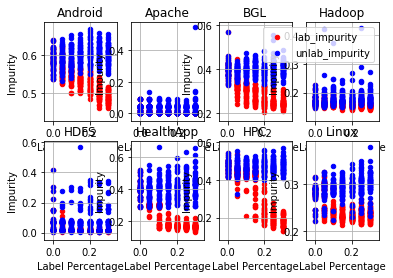

In [3]:
for idx, dataset in enumerate(['Android', 'Apache', 'BGL', 'Hadoop', 'HDFS', 'HealthApp', 'HPC', 'Linux']):
    dataset_filter = df['name'] == dataset
    dataset_df = df[dataset_filter]

    ax = plt.subplot(2, 4, idx + 1)
    
    dataset_df.plot(kind='scatter', x='percentage_labeled', y='lab_impurity', color='red', ax=ax)
    dataset_df.plot(kind='scatter', x='percentage_labeled', y='unlab_impurity', color='blue', ax=ax)
    plt.title(dataset)
    plt.xlabel('Label Percentage')
    plt.ylabel('Impurity')
    plt.grid()
    if idx == 3:
        plt.legend(['lab_impurity','unlab_impurity'])
plt.show()

In [4]:
results = {
    'name': [],
    'percentage_labeled': [],
    'wilcoxon_p_value': [],
}

for dataset in ['Android', 'Apache', 'BGL', 'Hadoop', 'HDFS', 'HealthApp', 'HPC', 'Linux']:
    dataset_filter = df['name'] == dataset
    dataset_df = df[dataset_filter]
    for p_label in df.percentage_labeled.unique():
        if p_label == 0:
            continue
        p_label_filter = dataset_df['percentage_labeled'] == p_label
        dataset_p_label_df = dataset_df[p_label_filter]

        diff_df = dataset_p_label_df['lab_impurity'] - dataset_p_label_df['unlab_impurity']
        _, p = wilcoxon(diff_df)
        results['name'].append(dataset)
        results['percentage_labeled'].append(p_label)
        results['wilcoxon_p_value'].append(p)
        
results_df = pd.DataFrame(results)

In [5]:
results_df.describe()[['wilcoxon_p_value']]

,wilcoxon_p_value
count,4.800000e+01
mean,2.258993e-03
std,9.653769e-03
min,7.556929e-10
25%,7.556929e-10
50%,2.512796e-09
75%,2.448606e-06
max,5.534272e-02


In [6]:
results_df.sort_values(by='wilcoxon_p_value', ascending=False).head(10).reset_index(drop=True)

,name,percentage_labeled,wilcoxon_p_value
0,Linux,0.05,0.055343
1,Hadoop,0.05,0.036624
2,Apache,0.05,0.014823
3,HDFS,0.05,0.001074
4,HDFS,0.10,0.000311
5,HPC,0.05,0.000213
6,HDFS,0.30,0.000008
7,Apache,0.10,0.000008
8,Apache,0.20,0.000008
9,Hadoop,0.10,0.000006
